#Uploading Datasets and models

In [1]:
!pip3 install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import PIL
import glob
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten, Dropout, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, Activation, concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import tabulate

In [3]:
#!pip3 install -U pip
#!pip3 install -U setuptools

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Make sure you upload zip file of the dataset into your Google Drive

Mounted at /content/drive


In [5]:
#!pip3 install --upgrade pip setuptools wheel

In [6]:
#!pip install opencv-python==4.3.0.38

In [7]:
import cv2

In [8]:
# First upload zip file of Natural Imagery Dataset into Google Drive
# Copy the path in your Google Drive by right clicking; Usage: !unzip <path>

!unzip '/content/drive/MyDrive/DATA4380-project/Natural_Imagery_Dataset'

# Now dataset should appear in Colab Virtual Environment

unzip:  cannot find or open /content/drive/MyDrive/DATA4380-project/Natural_Imagery_Dataset, /content/drive/MyDrive/DATA4380-project/Natural_Imagery_Dataset.zip or /content/drive/MyDrive/DATA4380-project/Natural_Imagery_Dataset.ZIP.


In [9]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
index  = [0, 1, 2, 3, 4, 5]

# Build a dictionary that maps the class to an index/integer

class_names_label = dict(list((zip(class_names, index))))
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [10]:
# Make sure you have proper path 
# TRAIN MUST BE FIRST BEFORE TEST

datasets = ['/content/drive/MyDrive/DATA4380-project/Natural_Imagery_Dataset/seg_train/seg_train',
            '/content/drive/MyDrive/DATA4380-project/Natural_Imagery_Dataset/seg_test']

for dataset in datasets:
    print(os.listdir(dataset))
    
   #label = class_names_label[folder]

['glacier', 'forest', 'buildings', 'mountain', 'street', 'sea']
['seg_test']


In [11]:
import opendatasets as od
import PIL
import glob
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, Activation, concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import tabulate

def mount_drive(fr = False):
    from google.colab import drive
    drive.mount("/content/drive/", force_remount = fr)
    
def fetch_rps(shuffle = False, train_test_split = True, random_state = 0, train_size = 0.8):
    
    rocklst, paperlst, scissorslst = glob.glob("drive/My Drive/DATA4380-project/rockpaperscissors/rock/*"), glob.glob("drive/My Drive/DATA4380-project/rockpaperscissors/paper/*"), glob.glob("drive/My Drive/DATA4380-project/rockpaperscissors/scissors/*")
    
    def form_array(arr):

        a = []
        arr = np.asarray(arr)
           
        for i in arr:
            zq = np.asarray(PIL.Image.open(i))
            a.append(zq)
        

        return np.array(a)/255.0

        ## Turning each list into a 4D array (n, 200, 300, 3) 
        ## which contains the RGB images as arrays.
        ## We can take each 3D array contained within the larger structure as an individual input.
        ## Our targets will be categorical based on the list that it came out of.

    rock, paper, scissors = form_array(rocklst), form_array(paperlst), form_array(scissorslst)
    
    labels = pd.get_dummies(pd.Series(np.array([1]*len(rock) + [2]*len(paper) + [3]*len(scissors)))).to_numpy() 
    #one-hot encoding all of the labels made up from a list
    
    images = np.concatenate((rock,paper,scissors), axis = 0)
    
    if(shuffle):
        images, labels = sklearn.utils.shuffle(images, labels, random_state = random_state)
    
    if(train_test_split):
        image_train, image_test, label_train, label_test = sklearn.model_selection.train_test_split(images, labels, random_state = random_state, train_size = train_size, shuffle = True)
        
        return image_train, label_train, image_test, label_test
    
    else:
        return images, labels
    
def fetch_nature():
    
    # Choose your image size
    # ResNet
    IMAGE_SIZE = (227, 227)
    
    output = []

    class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
    index  = [0, 1, 2, 3, 4, 5]

    # Build a dictionary that maps the category to an index/integer

    class_names_label = dict(list((zip(class_names, index))))

    # Iterate through training and test sets
    def function1(dataset):
      
        images = []
        labels = []

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in os.listdir(os.path.join(dataset, folder)):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # This function specifically is what resizes, IMAGE_SIZE is defined above
                image = cv2.resize(image, IMAGE_SIZE) 

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   

        # Shuffling
        images, labels = sklearn.utils.shuffle(images, labels)

        # Normalizing data
        images = images / 255.0
        
        #One-hot encoding
        labels = pd.get_dummies(pd.Series(labels)).to_numpy()

        return images, labels

    (image_train, label_train), (image_test, label_test) =  function1('/content/drive/MyDrive/DATA4380-project/Natural_Imagery_Dataset/seg_train/seg_train'), function1('/content/drive/MyDrive/DATA4380-project/Natural_Imagery_Dataset/seg_test/seg_test')

    return image_train, label_train, image_test, label_test
    
def fetch_eyes():
    
    # Choose your image size
    # ResNet
    IMAGE_SIZE = (227, 227)
    
    output = []

    class_names = ['Open', 'Closed', 'no_yawn', 'yawn']
    index  = [0, 1, 2, 3]

    # Build a dictionary that maps the category to an index/integer

    class_names_label = dict(list((zip(class_names, index))))

    # Iterate through training and test sets
    def function1(dataset):
      
        images = []
        labels = []

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in os.listdir(os.path.join(dataset, folder)):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # This function specifically is what resizes, IMAGE_SIZE is defined above
                image = cv2.resize(image, IMAGE_SIZE) 

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   

        # Shuffling
        images, labels = sklearn.utils.shuffle(images, labels)

        # Normalizing data
        images = images / 255.0 

        # One- hot Encoding
        labels = pd.get_dummies(pd.Series(labels)).to_numpy()

        return images, labels

    (image_train, label_train), (image_test, label_test) =  function1('/content/drive/MyDrive/DATA4380-project/yawn-eye-dataset-new/dataset_new/train'), function1('/content/drive/MyDrive/DATA4380-project/yawn-eye-dataset-new/dataset_new/test')

    return image_train, label_train, image_test, label_test



In [12]:
def custom_model(IMAGE_SIZE):
  model = keras.models.Sequential([
    Conv2D(filters=128,kernel_size = 10, activation = 'relu',input_shape= IMAGE_SIZE),
    MaxPooling2D(pool_size = 3),
    Conv2D(filters=96,kernel_size = 5, activation = 'relu'),
    MaxPooling2D(pool_size = 3),
    Flatten(),
    Dense(900, activation='relu'),
    Dropout(0.4),
    Dense(6, activation='softmax'),
    Dropout(0.4),
  ])

  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

  return model

In [13]:
IMAGE_SIZE1 = (200,300,3)
def custom_model2(IMAGE_SIZE1):
  model = keras.models.Sequential([
    Conv2D(filters=128,kernel_size = 10, activation = 'relu',input_shape= IMAGE_SIZE1),
    MaxPooling2D(pool_size = 3),
    Conv2D(filters=96,kernel_size = 5, activation = 'relu'),
    MaxPooling2D(pool_size = 3),
    Flatten(),
    Dense(900, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax'),
    Dropout(0.4),
  ])

  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

  return model

In [14]:
def custom_model3(IMAGE_SIZE):
  model = keras.models.Sequential([
    Conv2D(filters=128,kernel_size = 10, activation = 'relu',input_shape= IMAGE_SIZE),
    MaxPooling2D(pool_size = 3),
    Conv2D(filters=96,kernel_size = 5, activation = 'relu'),
    MaxPooling2D(pool_size = 3),
    Flatten(),
    Dense(900, activation='relu'),
    Dropout(0.4),
    Dense(4, activation='softmax'),
    Dropout(0.4),
  ])

  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

  return model

In [15]:
image_train, label_train, image_test, label_test = fetch_nature()

In [16]:
#image_train_rdc = image_train[:4666]
#print(image_train_rdc.shape)
#label_train_rdc = label_train[:4666]
#print(label_train_rdc.shape)

# Removing the original arrays from memory to have more "System RAM"
#%xdel image_train
#%xdel label_train

TypeError: ignored

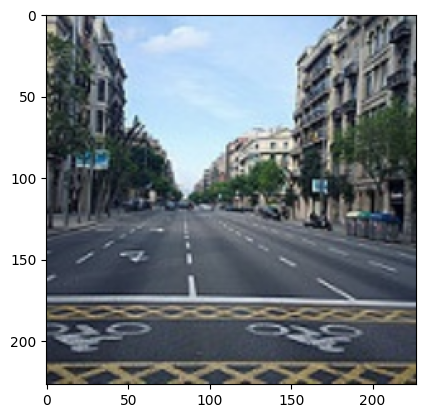

In [17]:
    index = np.random.randint(image_train.shape[0])
    plt.figure()
    plt.imshow(image_train[index])
    plt.title('{}'.format(class_names[label_train[index]]))
    plt.show()

# Function that will load images into arrays

In [18]:
model1 = custom_model((227,227,3))

In [19]:
history1 = model1.fit(image_train,label_train,validation_data=(image_test, label_test),batch_size= 16,epochs= 10,verbose = 1)

Epoch 1/10
878/878 [==============================] - 27s 19ms/step - loss: nan - accuracy: 0.2498 - val_loss: 1.1356 - val_accuracy: 0.5387
Epoch 2/10
878/878 [==============================] - 14s 16ms/step - loss: nan - accuracy: 0.4050 - val_loss: 1.0393 - val_accuracy: 0.5940
Epoch 3/10
878/878 [==============================] - 14s 16ms/step - loss: nan - accuracy: 0.4343 - val_loss: 0.9909 - val_accuracy: 0.5993
Epoch 4/10
878/878 [==============================] - 14s 16ms/step - loss: nan - accuracy: 0.4591 - val_loss: 0.9419 - val_accuracy: 0.6283
Epoch 5/10
878/878 [==============================] - 14s 16ms/step - loss: nan - accuracy: 0.4747 - val_loss: 1.1280 - val_accuracy: 0.5793
Epoch 6/10
878/878 [==============================] - 15s 17ms/step - loss: nan - accuracy: 0.4880 - val_loss: 0.9644 - val_accuracy: 0.6530
Epoch 7/10
878/878 [==============================] - 14s 16ms/step - loss: nan - accuracy: 0.5066 - val_loss: 1.0084 - val_accuracy: 0.6533
Epoch 8/10
87

In [ ]:
model1.summary()

In [20]:
y_pred = model1.predict(image_test)

94/94 [==============================] - 2s 16ms/step


In [21]:
scores = model1.evaluate(image_test, label_test)

94/94 [==============================] - 1s 15ms/step - loss: 1.0591 - accuracy: 0.6733


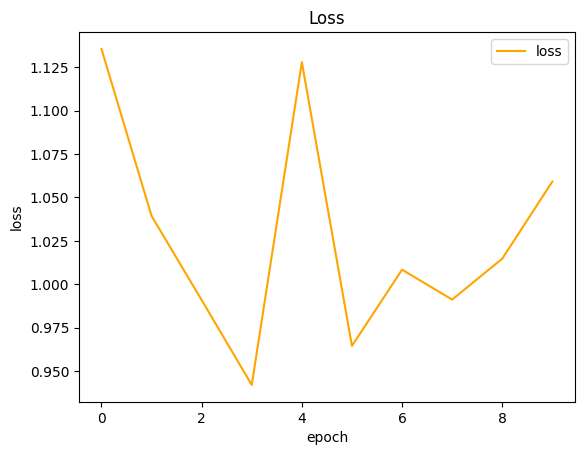

In [27]:
#loss plot
fig = plt.figure()
#plt.plot(history1.history['loss'],color = 'teal',label = 'loss')
plt.plot(history1.history['val_loss'],color = 'orange',label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

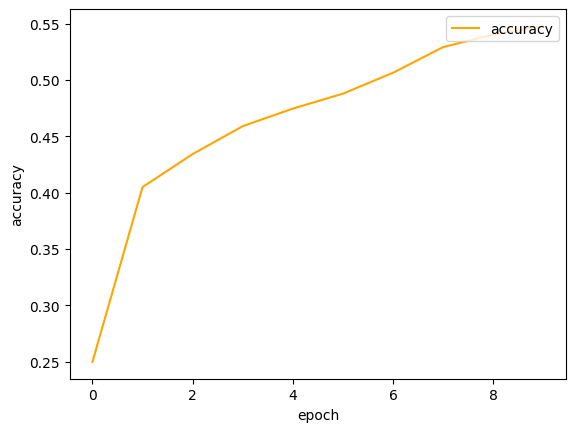

In [23]:
#accuracy plot
fig=plt.figure
plt.plot(history1.history['accuracy'],color = 'orange',label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'upper right')
plt.show()

In [31]:
# Generate predictions on the training and test datasets
label_train = np.argmax(label_train, axis=1)
label_test = np.argmax(label_test, axis=1)
train_preds = model1.predict(image_train)
test_preds = model1.predict(image_test)

# Convert predictions to binary labels
train_preds = np.argmax(train_preds, axis=1)
test_preds = np.argmax(test_preds, axis=1)

# Compute accuracy, recall, precision, and F1 score for training and test datasets
train_acc = accuracy_score(label_train, train_preds)
test_acc = accuracy_score(label_test, test_preds)

train_recall = recall_score(label_train, train_preds, average='macro')
test_recall = recall_score(label_test, test_preds, average='macro')

train_precision = precision_score(label_train, train_preds, average='macro')
test_precision = precision_score(label_test, test_preds, average='macro')

train_f1 = f1_score(label_train, train_preds, average='macro')
test_f1 = f1_score(label_test, test_preds, average='macro')

# Display the results in a table
import pandas as pd

df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Training Set': [train_acc, train_recall, train_precision, train_f1],
    'Test Set': [test_acc, test_recall, test_precision, test_f1]
})

print(df)

94/94 [==============================] - 1s 14ms/step
      Metric  Training Set  Test Set
0   Accuracy      0.923970  0.673333
1     Recall      0.924233  0.675684
2  Precision      0.926933  0.680738
3   F1 Score      0.925028  0.675810


# Rock Paper Scissors

In [ ]:
image_train2, label_train2, image_test2, label_test2 = fetch_rps()

In [ ]:
print(image_train2.shape)
print(label_train2.shape)
print(image_test2.shape)
print(label_test2.shape)

In [ ]:
model2 = custom_model2((200,300,3))

In [ ]:
history2 = model2.fit(image_train2,label_train2,validation_data=(image_test2, label_test2),batch_size= 16,epochs= 10,verbose = 1)

In [ ]:
history2.history

In [ ]:
#loss plot
fig = plt.figure()
#plt.plot(history2.history['loss'],color = 'teal',label = 'loss')
plt.plot(history2.history['val_loss'],color = 'orange',label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('loss')
plt.show()

In [ ]:
#accuracy plot
fig=plt.figure
plt.plot(history2.history['accuracy'],color = 'orange',label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'upper right')
plt.title('accuracy')
plt.show()

In [ ]:
# Generate predictions on the training and test datasets
label_train2 = np.argmax(label_train2, axis=1)
label_test2 = np.argmax(label_test2, axis=1)

train_preds = model2.predict(image_train2)
test_preds = model2.predict(image_test2)

# Convert predictions to binary labels
train_preds = np.argmax(train_preds, axis=1)
test_preds = np.argmax(test_preds, axis=1)

# Compute accuracy, recall, precision, and F1 score for training and test datasets
train_acc = accuracy_score(label_train2, train_preds)
test_acc = accuracy_score(label_test2, test_preds)

train_recall = recall_score(label_train2, train_preds, average='macro')
test_recall = recall_score(label_test2, test_preds, average='macro')

train_precision = precision_score(label_train2, train_preds, average='macro')
test_precision = precision_score(label_test2, test_preds, average='macro')

train_f1 = f1_score(label_train2, train_preds, average='macro')
test_f1 = f1_score(label_test2, test_preds, average='macro')

# Display the results in a table
import pandas as pd

df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Training Set': [train_acc, train_recall, train_precision, train_f1],
    'Test Set': [test_acc, test_recall, test_precision, test_f1]
})

print(df)

# Eyes

In [ ]:
image_train3, label_train3, image_test3, label_test3 = fetch_eyes()

In [ ]:
model3 = custom_model3((227,227,3))
print(image_train3.shape)
print(label_train3.shape)
print(image_test3.shape)
print(label_test3.shape)

In [ ]:
history3 = model3.fit(image_train3,label_train3,validation_data=(image_test3, label_test3),batch_size= 16,epochs= 10,verbose = 1)

In [ ]:
#loss plot
fig = plt.figure()
#plt.plot(history3.history['loss'],color = 'teal',label = 'loss')
plt.plot(history3.history['val_loss'],color = 'orange',label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#accuracy plot
fig=plt.figure
plt.plot(history3.history['accuracy'],color = 'orange',label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
# Generate predictions on the training and test datasets
label_train3 = np.argmax(label_train3, axis=1)
label_test3 = np.argmax(label_test3, axis=1)

train_preds = model3.predict(image_train3)
test_preds = model3.predict(image_test3)

# Convert predictions to binary labels
train_preds = np.argmax(train_preds, axis=1)
test_preds = np.argmax(test_preds, axis=1)

# Compute accuracy, recall, precision, and F1 score for training and test datasets
train_acc = accuracy_score(label_train3, train_preds)
test_acc = accuracy_score(label_test3, test_preds)

train_recall = recall_score(label_train3, train_preds, average='macro')
test_recall = recall_score(label_test3, test_preds, average='macro')

train_precision = precision_score(label_train3, train_preds, average='macro')
test_precision = precision_score(label_test3, test_preds, average='macro')

train_f1 = f1_score(label_train3, train_preds, average='macro')
test_f1 = f1_score(label_test3, test_preds, average='macro')

# Display the results in a table
import pandas as pd

df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Training Set': [train_acc, train_recall, train_precision, train_f1],
    'Test Set': [test_acc, test_recall, test_precision, test_f1]
})

print(df)